In [3]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
# loading data
data = np.loadtxt('data2.txt',delimiter=',')
print(data.shape)
num_feature = data.shape[1] - 1
data = data.astype('float32')

(100, 3)


In [5]:
# data normalization
data_ori = data.copy()
maximum = np.max(data[:, :num_feature],axis=0,keepdims=True)
minimun = np.min(data[:, :num_feature],axis=0,keepdims=True)
data[:, :num_feature] = (data[:, :num_feature] - minimun)/(maximum - minimun)

In [6]:
# train val split
data_train, data_test = train_test_split(data, test_size=0.3, random_state=42)
X_train = data_train[:, :2]
X_train = np.concatenate((X_train, np.ones((X_train.shape[0],1))), axis=1)
y_train = data_train[:, 2]
X_test = data_test[:, :2]
X_test = np.concatenate((X_test, np.ones((X_test.shape[0],1))), axis=1)
y_test = data_test[:, 2]

In [7]:
# model init
w = np.zeros((num_feature+1,1))

def cross_entropy_loss(y_pred,y):
    return -np.mean(y*np.log(y_pred+0.001)+(1-y)*np.log(1-y_pred+0.001))

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

iterations = 10000
lr = 0.01

In [9]:
log = []
# gradient descent
for i in range(iterations):
    y_pred = sigmoid(np.matmul(X_train, w))
    g = lr*np.mean((y_pred-y_train.reshape(-1,1))*X_train, axis=0).reshape(-1,1)
    w -= g
    loss = cross_entropy_loss(y_pred,y_train)
    print('iter:{},loss:{}'.format(i,loss))
    y_pred_test = sigmoid(np.matmul(X_test, w))
    loss = cross_entropy_loss(y_pred_test,y_test)
#     print('iter:{},val_loss:{}'.format(i,loss))
    log.append([i,loss])

iter:0,loss:0.8647345955393451
iter:1,loss:0.8647541568811121
iter:2,loss:0.8647737177463659
iter:3,loss:0.8647932781350637
iter:4,loss:0.8648128380471626
iter:5,loss:0.8648323974826203
iter:6,loss:0.8648519564413939
iter:7,loss:0.864871514923441
iter:8,loss:0.8648910729287191
iter:9,loss:0.8649106304571856
iter:10,loss:0.8649301875087978
iter:11,loss:0.8649497440835137
iter:12,loss:0.8649693001812904
iter:13,loss:0.8649888558020857
iter:14,loss:0.8650084109458572
iter:15,loss:0.8650279656125623
iter:16,loss:0.8650475198021594
iter:17,loss:0.8650670735146054
iter:18,loss:0.8650866267498586
iter:19,loss:0.8651061795078762
iter:20,loss:0.8651257317886165
iter:21,loss:0.865145283592037
iter:22,loss:0.8651648349180959
iter:23,loss:0.8651843857667507
iter:24,loss:0.8652039361379595
iter:25,loss:0.8652234860316801
iter:26,loss:0.8652430354478706
iter:27,loss:0.8652625843864891
iter:28,loss:0.8652821328474932
iter:29,loss:0.8653016808308415
iter:30,loss:0.8653212283364914
iter:31,loss:0.86534

iter:828,loss:0.8807647326172884
iter:829,loss:0.8807838872591618
iter:830,loss:0.8808030413978895
iter:831,loss:0.8808221950334485
iter:832,loss:0.8808413481658159
iter:833,loss:0.8808605007949695
iter:834,loss:0.880879652920886
iter:835,loss:0.8808988045435431
iter:836,loss:0.8809179556629176
iter:837,loss:0.8809371062789875
iter:838,loss:0.8809562563917293
iter:839,loss:0.8809754060011207
iter:840,loss:0.8809945551071396
iter:841,loss:0.8810137037097626
iter:842,loss:0.8810328518089678
iter:843,loss:0.8810519994047321
iter:844,loss:0.8810711464970332
iter:845,loss:0.8810902930858486
iter:846,loss:0.8811094391711556
iter:847,loss:0.881128584752932
iter:848,loss:0.8811477298311551
iter:849,loss:0.8811668744058027
iter:850,loss:0.8811860184768522
iter:851,loss:0.881205162044281
iter:852,loss:0.881224305108067
iter:853,loss:0.881243447668188
iter:854,loss:0.8812625897246211
iter:855,loss:0.8812817312773445
iter:856,loss:0.8813008723263359
iter:857,loss:0.8813200128715724
iter:858,loss:0

iter:1470,loss:0.8929576164537213
iter:1471,loss:0.8929764442020964
iter:1472,loss:0.8929952714364342
iter:1473,loss:0.8930140981567233
iter:1474,loss:0.8930329243629521
iter:1475,loss:0.893051750055109
iter:1476,loss:0.8930705752331822
iter:1477,loss:0.8930893998971609
iter:1478,loss:0.8931082240470324
iter:1479,loss:0.8931270476827858
iter:1480,loss:0.8931458708044098
iter:1481,loss:0.8931646934118924
iter:1482,loss:0.8931835155052223
iter:1483,loss:0.893202337084388
iter:1484,loss:0.893221158149378
iter:1485,loss:0.8932399787001809
iter:1486,loss:0.8932587987367853
iter:1487,loss:0.8932776182591798
iter:1488,loss:0.8932964372673529
iter:1489,loss:0.893315255761293
iter:1490,loss:0.8933340737409892
iter:1491,loss:0.8933528912064297
iter:1492,loss:0.8933717081576035
iter:1493,loss:0.8933905245944991
iter:1494,loss:0.8934093405171051
iter:1495,loss:0.8934281559254105
iter:1496,loss:0.8934469708194034
iter:1497,loss:0.8934657851990732
iter:1498,loss:0.8934845990644082
iter:1499,loss:0.8

iter:2176,loss:0.9061215470928626
iter:2177,loss:0.9061400098513807
iter:2178,loss:0.9061584720910365
iter:2179,loss:0.9061769338118277
iter:2180,loss:0.9061953950137516
iter:2181,loss:0.906213855696806
iter:2182,loss:0.9062323158609884
iter:2183,loss:0.906250775506296
iter:2184,loss:0.9062692346327265
iter:2185,loss:0.9062876932402777
iter:2186,loss:0.906306151328947
iter:2187,loss:0.906324608898732
iter:2188,loss:0.9063430659496301
iter:2189,loss:0.9063615224816396
iter:2190,loss:0.9063799784947572
iter:2191,loss:0.906398433988981
iter:2192,loss:0.9064168889643087
iter:2193,loss:0.9064353434207378
iter:2194,loss:0.9064537973582661
iter:2195,loss:0.9064722507768913
iter:2196,loss:0.9064907036766108
iter:2197,loss:0.9065091560574228
iter:2198,loss:0.9065276079193242
iter:2199,loss:0.9065460592623135
iter:2200,loss:0.906564510086388
iter:2201,loss:0.9065829603915456
iter:2202,loss:0.9066014101777843
iter:2203,loss:0.9066198594451013
iter:2204,loss:0.9066383081934948
iter:2205,loss:0.906

iter:2869,loss:0.918791787605808
iter:2870,loss:0.9188098907567708
iter:2871,loss:0.9188279933895234
iter:2872,loss:0.91884609550407
iter:2873,loss:0.9188641971004149
iter:2874,loss:0.9188822981785624
iter:2875,loss:0.9189003987385158
iter:2876,loss:0.9189184987802798
iter:2877,loss:0.9189365983038587
iter:2878,loss:0.9189546973092558
iter:2879,loss:0.9189727957964757
iter:2880,loss:0.9189908937655223
iter:2881,loss:0.9190089912164
iter:2882,loss:0.919027088149113
iter:2883,loss:0.9190451845636651
iter:2884,loss:0.9190632804600604
iter:2885,loss:0.9190813758383034
iter:2886,loss:0.9190994706983979
iter:2887,loss:0.9191175650403487
iter:2888,loss:0.919135658864159
iter:2889,loss:0.9191537521698337
iter:2890,loss:0.919171844957377
iter:2891,loss:0.9191899372267928
iter:2892,loss:0.9192080289780854
iter:2893,loss:0.9192261202112589
iter:2894,loss:0.9192442109263178
iter:2895,loss:0.9192623011232663
iter:2896,loss:0.9192803908021084
iter:2897,loss:0.9192984799628483
iter:2898,loss:0.919316

iter:3557,loss:0.9311245766171602
iter:3558,loss:0.9311423245981941
iter:3559,loss:0.9311600720655153
iter:3560,loss:0.9311778190191324
iter:3561,loss:0.9311955654590539
iter:3562,loss:0.931213311385289
iter:3563,loss:0.9312310567978461
iter:3564,loss:0.9312488016967343
iter:3565,loss:0.9312665460819625
iter:3566,loss:0.931284289953539
iter:3567,loss:0.9313020333114731
iter:3568,loss:0.9313197761557737
iter:3569,loss:0.9313375184864489
iter:3570,loss:0.9313552603035083
iter:3571,loss:0.9313730016069605
iter:3572,loss:0.9313907423968143
iter:3573,loss:0.9314084826730786
iter:3574,loss:0.9314262224357621
iter:3575,loss:0.9314439616848736
iter:3576,loss:0.9314617004204225
iter:3577,loss:0.9314794386424171
iter:3578,loss:0.9314971763508669
iter:3579,loss:0.93151491354578
iter:3580,loss:0.9315326502271657
iter:3581,loss:0.931550386395033
iter:3582,loss:0.9315681220493904
iter:3583,loss:0.9315858571902476
iter:3584,loss:0.9316035918176128
iter:3585,loss:0.9316213259314952
iter:3586,loss:0.93

iter:4260,loss:0.9434752079703013
iter:4261,loss:0.9434925972851125
iter:4262,loss:0.9435099860936642
iter:4263,loss:0.9435273743959687
iter:4264,loss:0.943544762192038
iter:4265,loss:0.9435621494818848
iter:4266,loss:0.9435795362655209
iter:4267,loss:0.9435969225429587
iter:4268,loss:0.9436143083142102
iter:4269,loss:0.9436316935792884
iter:4270,loss:0.9436490783382051
iter:4271,loss:0.9436664625909725
iter:4272,loss:0.9436838463376028
iter:4273,loss:0.9437012295781083
iter:4274,loss:0.9437186123125016
iter:4275,loss:0.9437359945407947
iter:4276,loss:0.9437533762629996
iter:4277,loss:0.9437707574791294
iter:4278,loss:0.9437881381891956
iter:4279,loss:0.943805518393211
iter:4280,loss:0.9438228980911878
iter:4281,loss:0.9438402772831382
iter:4282,loss:0.9438576559690747
iter:4283,loss:0.9438750341490094
iter:4284,loss:0.9438924118229542
iter:4285,loss:0.9439097889909224
iter:4286,loss:0.9439271656529259
iter:4287,loss:0.9439445418089766
iter:4288,loss:0.9439619174590875
iter:4289,loss:0

iter:4932,loss:0.955047336569778
iter:4933,loss:0.9550643886262395
iter:4934,loss:0.9550814401854887
iter:4935,loss:0.9550984912475404
iter:4936,loss:0.9551155418124095
iter:4937,loss:0.9551325918801101
iter:4938,loss:0.9551496414506567
iter:4939,loss:0.9551666905240641
iter:4940,loss:0.9551837391003469
iter:4941,loss:0.9552007871795196
iter:4942,loss:0.9552178347615969
iter:4943,loss:0.9552348818465933
iter:4944,loss:0.9552519284345229
iter:4945,loss:0.9552689745254013
iter:4946,loss:0.9552860201192422
iter:4947,loss:0.9553030652160606
iter:4948,loss:0.9553201098158711
iter:4949,loss:0.9553371539186882
iter:4950,loss:0.9553541975245264
iter:4951,loss:0.9553712406334005
iter:4952,loss:0.9553882832453251
iter:4953,loss:0.9554053253603145
iter:4954,loss:0.9554223669783838
iter:4955,loss:0.9554394080995473
iter:4956,loss:0.9554564487238197
iter:4957,loss:0.9554734888512156
iter:4958,loss:0.9554905284817495
iter:4959,loss:0.9555075676154366
iter:4960,loss:0.9555246062522906
iter:4961,loss:

iter:5593,loss:0.9662110076652135
iter:5594,loss:0.9662277343658223
iter:5595,loss:0.9662444605793968
iter:5596,loss:0.9662611863059535
iter:5597,loss:0.9662779115455082
iter:5598,loss:0.9662946362980772
iter:5599,loss:0.9663113605636767
iter:5600,loss:0.9663280843423226
iter:5601,loss:0.9663448076340312
iter:5602,loss:0.9663615304388188
iter:5603,loss:0.9663782527567016
iter:5604,loss:0.966394974587695
iter:5605,loss:0.9664116959318161
iter:5606,loss:0.9664284167890808
iter:5607,loss:0.9664451371595046
iter:5608,loss:0.9664618570431046
iter:5609,loss:0.9664785764398965
iter:5610,loss:0.9664952953498965
iter:5611,loss:0.9665120137731207
iter:5612,loss:0.9665287317095853
iter:5613,loss:0.9665454491593066
iter:5614,loss:0.9665621661223011
iter:5615,loss:0.966578882598584
iter:5616,loss:0.9665955985881722
iter:5617,loss:0.9666123140910817
iter:5618,loss:0.9666290291073287
iter:5619,loss:0.9666457436369296
iter:5620,loss:0.9666624576799001
iter:5621,loss:0.9666791712362569
iter:5622,loss:0

iter:6233,loss:0.9768172215048643
iter:6234,loss:0.9768336398799566
iter:6235,loss:0.9768500577786912
iter:6236,loss:0.9768664752010847
iter:6237,loss:0.9768828921471543
iter:6238,loss:0.9768993086169171
iter:6239,loss:0.9769157246103903
iter:6240,loss:0.9769321401275912
iter:6241,loss:0.976948555168537
iter:6242,loss:0.9769649697332444
iter:6243,loss:0.9769813838217309
iter:6244,loss:0.9769977974340137
iter:6245,loss:0.9770142105701101
iter:6246,loss:0.9770306232300369
iter:6247,loss:0.9770470354138112
iter:6248,loss:0.9770634471214507
iter:6249,loss:0.9770798583529722
iter:6250,loss:0.977096269108393
iter:6251,loss:0.97711267938773
iter:6252,loss:0.9771290891910007
iter:6253,loss:0.9771454985182223
iter:6254,loss:0.9771619073694114
iter:6255,loss:0.9771783157445861
iter:6256,loss:0.9771947236437629
iter:6257,loss:0.9772111310669592
iter:6258,loss:0.9772275380141924
iter:6259,loss:0.9772439444854788
iter:6260,loss:0.9772603504808367
iter:6261,loss:0.9772767560002826
iter:6262,loss:0.9

iter:6925,loss:0.98806580050987
iter:6926,loss:0.9880818934070325
iter:6927,loss:0.9880979858399594
iter:6928,loss:0.988114077808669
iter:6929,loss:0.9881301693131789
iter:6930,loss:0.9881462603535068
iter:6931,loss:0.9881623509296711
iter:6932,loss:0.9881784410416891
iter:6933,loss:0.9881945306895786
iter:6934,loss:0.9882106198733576
iter:6935,loss:0.9882267085930437
iter:6936,loss:0.9882427968486552
iter:6937,loss:0.9882588846402097
iter:6938,loss:0.9882749719677246
iter:6939,loss:0.9882910588312185
iter:6940,loss:0.9883071452307085
iter:6941,loss:0.988323231166213
iter:6942,loss:0.9883393166377495
iter:6943,loss:0.9883554016453356
iter:6944,loss:0.98837148618899
iter:6945,loss:0.9883875702687297
iter:6946,loss:0.9884036538845727
iter:6947,loss:0.9884197370365373
iter:6948,loss:0.9884358197246406
iter:6949,loss:0.9884519019489009
iter:6950,loss:0.988467983709336
iter:6951,loss:0.9884840650059636
iter:6952,loss:0.9885001458388017
iter:6953,loss:0.9885162262078678
iter:6954,loss:0.9885

iter:7596,loss:0.998760679674832
iter:7597,loss:0.9987764651048663
iter:7598,loss:0.9987922500827454
iter:7599,loss:0.9988080346084867
iter:7600,loss:0.9988238186821091
iter:7601,loss:0.9988396023036304
iter:7602,loss:0.9988553854730685
iter:7603,loss:0.998871168190442
iter:7604,loss:0.9988869504557687
iter:7605,loss:0.9989027322690668
iter:7606,loss:0.9989185136303548
iter:7607,loss:0.9989342945396504
iter:7608,loss:0.9989500749969719
iter:7609,loss:0.9989658550023373
iter:7610,loss:0.998981634555765
iter:7611,loss:0.998997413657273
iter:7612,loss:0.9990131923068796
iter:7613,loss:0.9990289705046026
iter:7614,loss:0.9990447482504603
iter:7615,loss:0.9990605255444713
iter:7616,loss:0.9990763023866531
iter:7617,loss:0.9990920787770242
iter:7618,loss:0.9991078547156023
iter:7619,loss:0.9991236302024061
iter:7620,loss:0.9991394052374536
iter:7621,loss:0.9991551798207629
iter:7622,loss:0.9991709539523521
iter:7623,loss:0.999186727632239
iter:7624,loss:0.9992025008604425
iter:7625,loss:0.99

iter:8173,loss:1.0077943141846317
iter:8174,loss:1.0078098417419485
iter:8175,loss:1.007825368857607
iter:8176,loss:1.007840895531626
iter:8177,loss:1.007856421764023
iter:8178,loss:1.007871947554816
iter:8179,loss:1.007887472904024
iter:8180,loss:1.0079029978116647
iter:8181,loss:1.0079185222777565
iter:8182,loss:1.0079340463023176
iter:8183,loss:1.0079495698853664
iter:8184,loss:1.007965093026921
iter:8185,loss:1.0079806157269993
iter:8186,loss:1.0079961379856197
iter:8187,loss:1.0080116598028008
iter:8188,loss:1.0080271811785604
iter:8189,loss:1.0080427021129172
iter:8190,loss:1.0080582226058887
iter:8191,loss:1.0080737426574933
iter:8192,loss:1.0080892622677498
iter:8193,loss:1.0081047814366755
iter:8194,loss:1.0081203001642896
iter:8195,loss:1.0081358184506097
iter:8196,loss:1.0081513362956542
iter:8197,loss:1.0081668536994415
iter:8198,loss:1.0081823706619895
iter:8199,loss:1.0081978871833164
iter:8200,loss:1.0082134032634407
iter:8201,loss:1.0082289189023805
iter:8202,loss:1.008

iter:8811,loss:1.0176119340710192
iter:8812,loss:1.017627183550322
iter:8813,loss:1.0176424325995754
iter:8814,loss:1.0176576812187976
iter:8815,loss:1.0176729294080071
iter:8816,loss:1.0176881771672215
iter:8817,loss:1.0177034244964596
iter:8818,loss:1.017718671395739
iter:8819,loss:1.017733917865078
iter:8820,loss:1.0177491639044949
iter:8821,loss:1.0177644095140075
iter:8822,loss:1.0177796546936344
iter:8823,loss:1.0177948994433932
iter:8824,loss:1.0178101437633027
iter:8825,loss:1.0178253876533807
iter:8826,loss:1.0178406311136452
iter:8827,loss:1.0178558741441146
iter:8828,loss:1.017871116744807
iter:8829,loss:1.0178863589157399
iter:8830,loss:1.0179016006569328
iter:8831,loss:1.0179168419684026
iter:8832,loss:1.0179320828501681
iter:8833,loss:1.0179473233022471
iter:8834,loss:1.0179625633246578
iter:8835,loss:1.017977802917419
iter:8836,loss:1.0179930420805476
iter:8837,loss:1.0180082808140631
iter:8838,loss:1.0180235191179825
iter:8839,loss:1.0180387569923246
iter:8840,loss:1.01

iter:9489,loss:1.0278533196218371
iter:9490,loss:1.027868281678445
iter:9491,loss:1.0278832433172413
iter:9492,loss:1.0278982045382434
iter:9493,loss:1.0279131653414695
iter:9494,loss:1.0279281257269377
iter:9495,loss:1.0279430856946654
iter:9496,loss:1.0279580452446713
iter:9497,loss:1.0279730043769728
iter:9498,loss:1.0279879630915878
iter:9499,loss:1.0280029213885347
iter:9500,loss:1.0280178792678307
iter:9501,loss:1.0280328367294944
iter:9502,loss:1.0280477937735435
iter:9503,loss:1.0280627503999955
iter:9504,loss:1.0280777066088689
iter:9505,loss:1.0280926624001816
iter:9506,loss:1.0281076177739512
iter:9507,loss:1.0281225727301957
iter:9508,loss:1.028137527268933
iter:9509,loss:1.0281524813901814
iter:9510,loss:1.0281674350939585
iter:9511,loss:1.0281823883802819
iter:9512,loss:1.02819734124917
iter:9513,loss:1.0282122937006408
iter:9514,loss:1.0282272457347121
iter:9515,loss:1.0282421973514015
iter:9516,loss:1.0282571485507277
iter:9517,loss:1.0282720993327072
iter:9518,loss:1.0

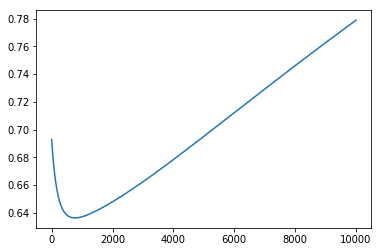

In [80]:
# loss curve visualization
log = np.array(log)
plt.plot(log[:,0],log[:,1])

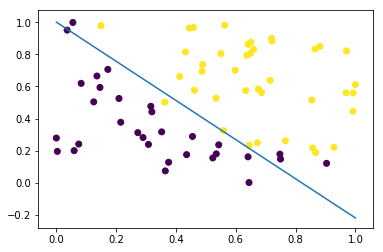

In [81]:
# visualization
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)
x = np.linspace(0,1,10)
y = (- w[0]*x - w[2])/w[1]
plt.plot(x, y)


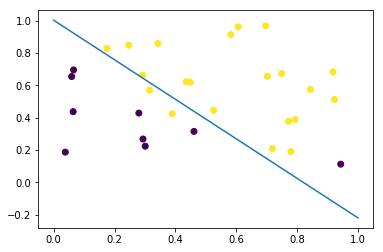

In [82]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test)
x = np.linspace(0,1,10)
y = (- w[0]*x - w[2])/w[1]
plt.plot(x, y)

0.18913199175146167
